In [5]:
library(gap)
library(dplyr)
library(ggplot2)
library(VennDiagram)

gap version 1.2.1

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: grid
Loading required package: futile.logger


## Panel A - Manhattan plot

In [2]:
data=read.delim("data/fig2_sex-biased_eQTL_results.txt")
#select top 10 genes
top10m=data %>% top_n(-10,q_males)
top10m
top10f=data %>% top_n(-10,q_females)
top10f

ERROR: Error in data %>% top_n(-10, q_males): konnte Funktion "%>%" nicht finden


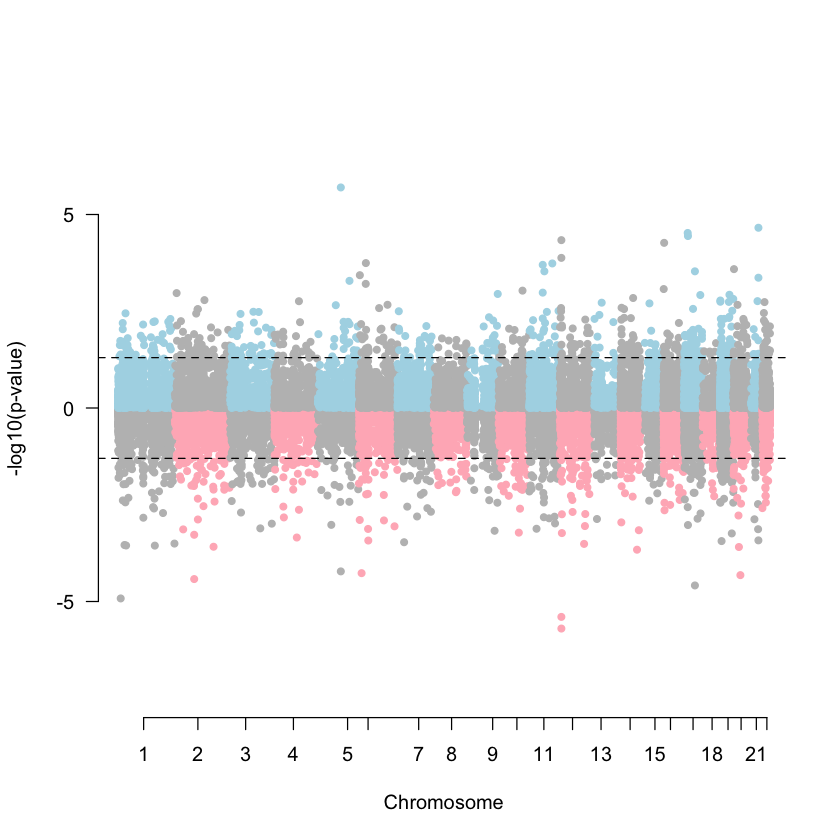

In [3]:
ops=control=mht.control(cutoffs=c(-log10(0.05)),labels=paste("Chr",1:22,sep=""))
#png("Figure2A.png",height=3600,width=6000,res=600)
miamiplot(data,chr="CHR",bp="P_start",p="q_females",pr="q_males",snp="Probe_Id",lcols = c(),
          col = c("lightblue", "grey"), col2 = c("grey", "lightpink"),ylab="-log10(p-value)")
abline(h = -log10(0.05),lty = 2, lwd = 1)
abline(h = log10(0.05),lty = 2, lwd = 1)
#dev.off()

## Panel B - Scatterplot

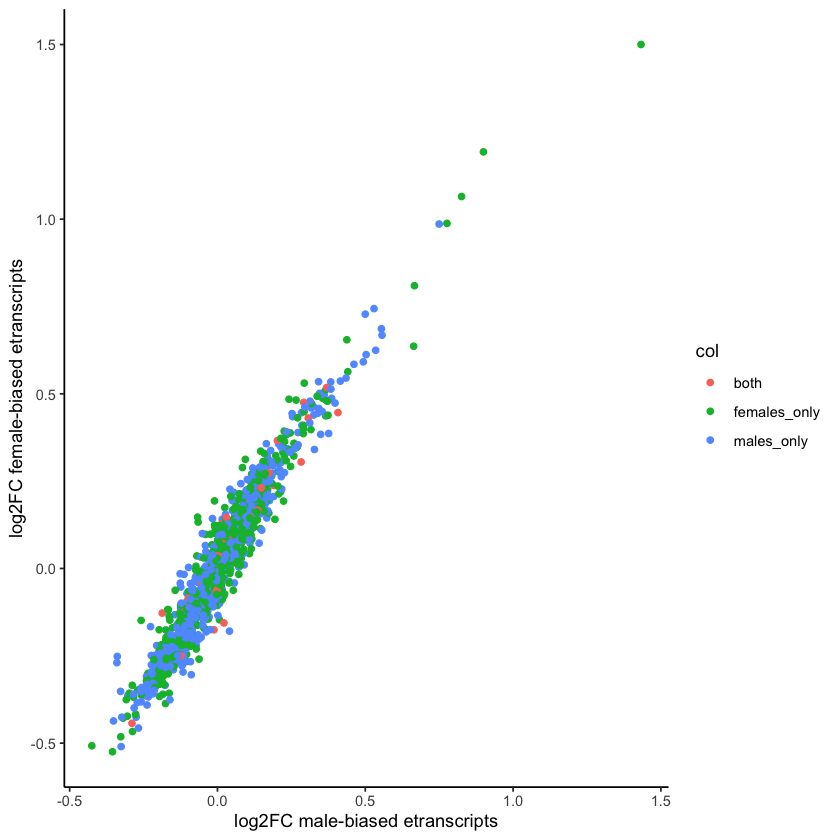

In [9]:
male.eqtl = read.csv("../Supplementary_Tables/SupplementaryTable_6_males_GR_2020.csv")
female.eqtl = read.csv("../Supplementary_Tables/SupplementaryTable_5_females_GR_2020.csv")

both= read.delim("data/fig1_DEresults.txt")
both$col="neither"
male_fe=intersect(female.eqtl$Probe_Id, male.eqtl$Probe_Id)
#length(male_fe)#46
both[ both$X %in% male_fe,]$col="both"
m_only=setdiff(male.eqtl$Probe_Id,female.eqtl$Probe_Id) 
#length(m_only)#616
both[ both$X %in% m_only,]$col="males_only"
fe_only=setdiff(female.eqtl$Probe_Id, male.eqtl$Probe_Id) 
#length(fe_only)#567
both[ both$X %in% fe_only,]$col="females_only"

ggplot(data = both[ both$col!="neither",], aes(x = log2FC.males, y = log2FC.females, 
colour = col)) +geom_point()+ theme_classic()+ xlab("log2FC male-biased etranscripts")+
ylab("log2FC female-biased etranscripts")

## Panel C - Venn diagram

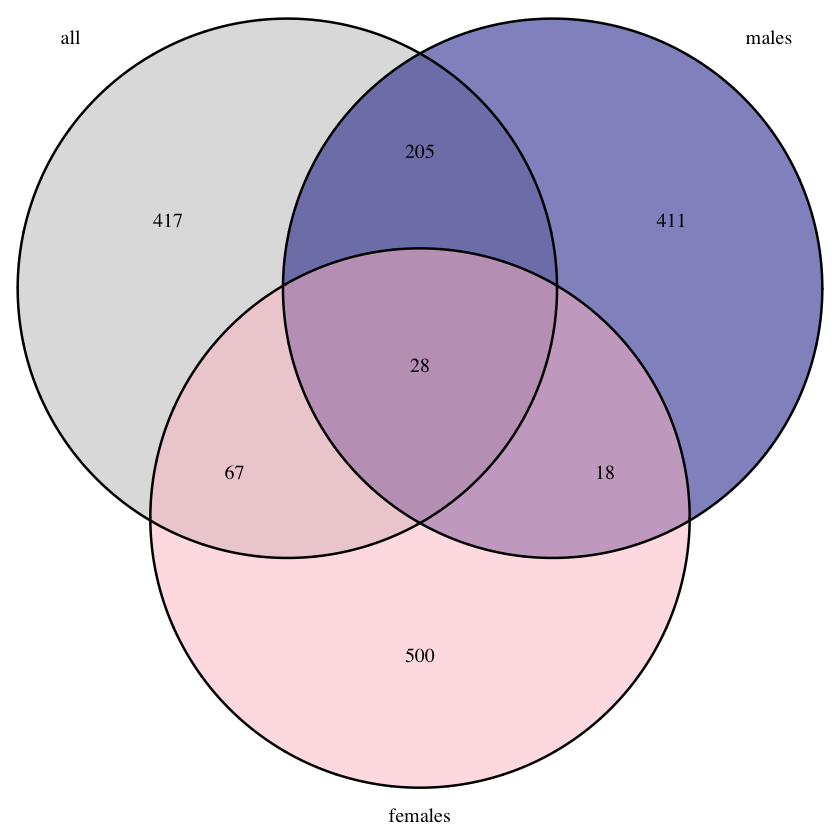

In [7]:
all.eqtl = read.csv("../Supplementary_Tables/SupplementaryTable_4_all_GReQTLs_2020.csv")

mixed_male=length(intersect(all.eqtl$Probe_Id,male.eqtl$Probe_Id))
mixed_fe=length(intersect(all.eqtl$Probe_Id,female.eqtl$Probe_Id))
male_fe=length(intersect(female.eqtl$Probe_Id, male.eqtl$Probe_Id))
mixed_male_fe=length(intersect(all.eqtl$Probe_Id, intersect(female.eqtl$Probe_Id,male.eqtl$Probe_Id)))

grid.newpage()
venn.plot <- draw.triple.venn(
  area1 = length(unique(all.eqtl$Probe_Id)),
  area2 = length(unique(male.eqtl$Probe_Id)),
  area3 = length(unique(female.eqtl$Probe_Id)),
  n12 = mixed_male,
  n23 = male_fe,
  n13 = mixed_fe,
  n123 = mixed_male_fe,
  category = c("all", "males", "females"),
  fill = c("grey", "darkblue", "pink"),
  euler.d=T, 
  scaled=TRUE)

## Panel D - Venn diagrams with FC cutoff

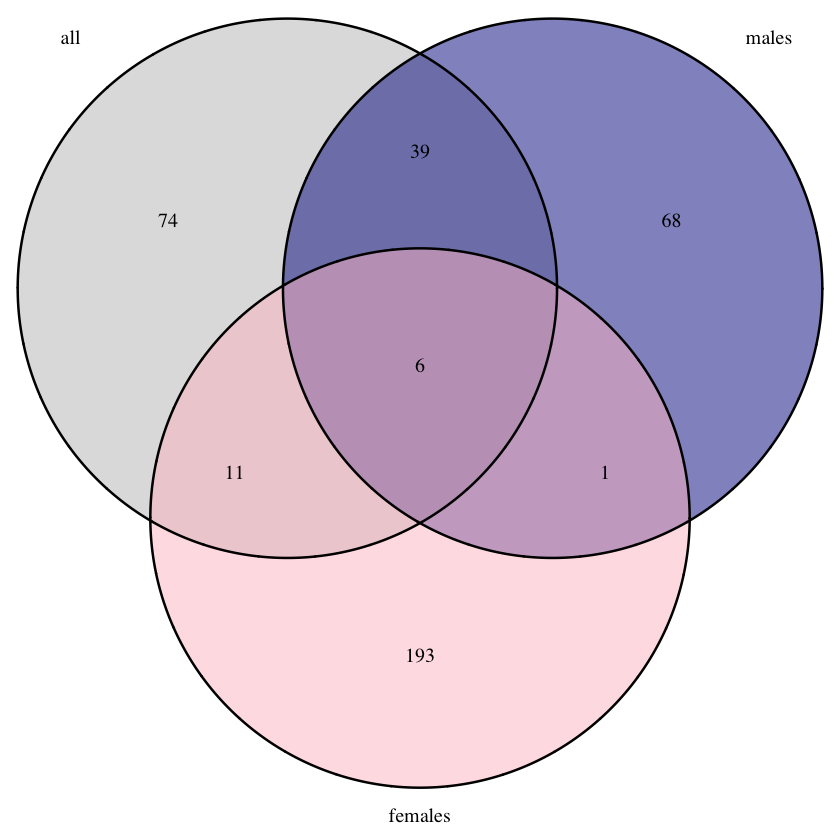

In [8]:
all.eqtl.fc=all.eqtl[abs(all.eqtl$log2FC)>=0.2,] #all_gr2
male.eqtl.fc=male.eqtl[abs(male.eqtl$log2FC.males)>=0.2,] #m_gr2
female.eqtl.fc=female.eqtl[abs(female.eqtl$log2FC.females)>=0.2,]#fe_gr2

mixed_male=length(intersect(all.eqtl.fc$Probe_Id,male.eqtl.fc$Probe_Id))
mixed_fe=length(intersect(all.eqtl.fc$Probe_Id,female.eqtl.fc$Probe_Id))
male_fe=length(intersect(female.eqtl.fc$Probe_Id, male.eqtl.fc$Probe_Id))
mixed_male_fe=length(intersect(all.eqtl.fc$Probe_Id, intersect(female.eqtl.fc$Probe_Id,male.eqtl.fc$Probe_Id)))

grid.newpage()
venn.plot <- draw.triple.venn(
  area1 = length(unique(all.eqtl.fc$Probe_Id)),
  area2 = length(unique(male.eqtl.fc$Probe_Id)),
  area3 = length(unique(female.eqtl.fc$Probe_Id)),
  n12 = mixed_male,
  n23 = male_fe,
  n13 = mixed_fe,
  n123 = mixed_male_fe,
  category = c("all", "males", "females"),
  fill = c("grey", "darkblue", "pink"),
  scaled=TRUE)

## Panel E-G - Boxplots

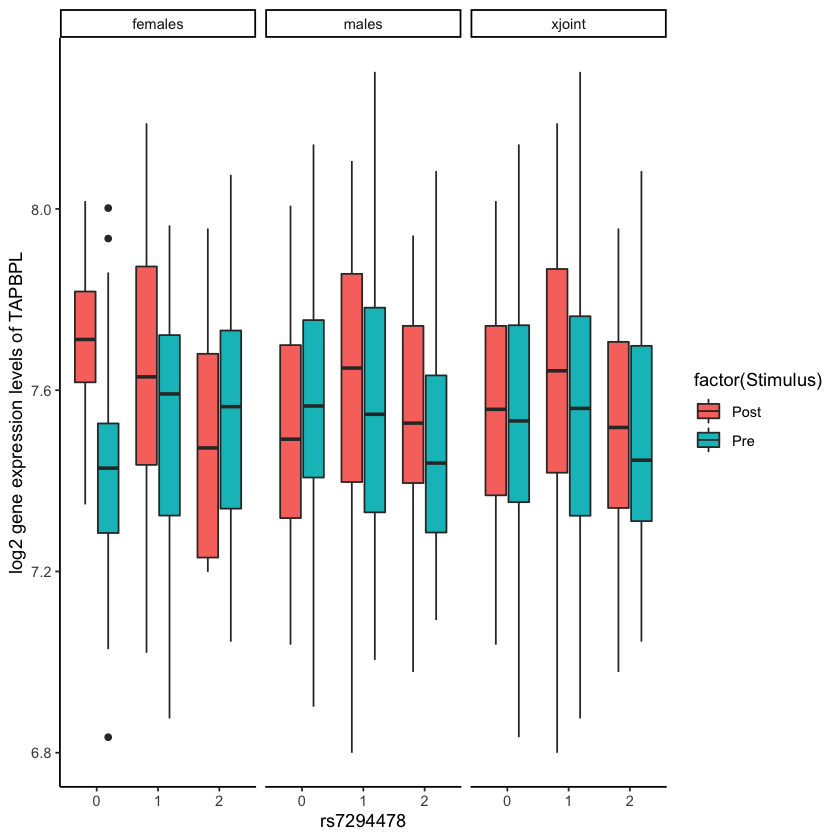

In [14]:
#female specific GR-response eQTL
exampleF = readRDS("data/fig2E_female_eQTL.rds")
#pdf("ILMN_1805449.pdf")
ggplot(na.omit(exampleF), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs7294478")+ylab("log2 gene expression levels of TAPBPL")
#dev.off()

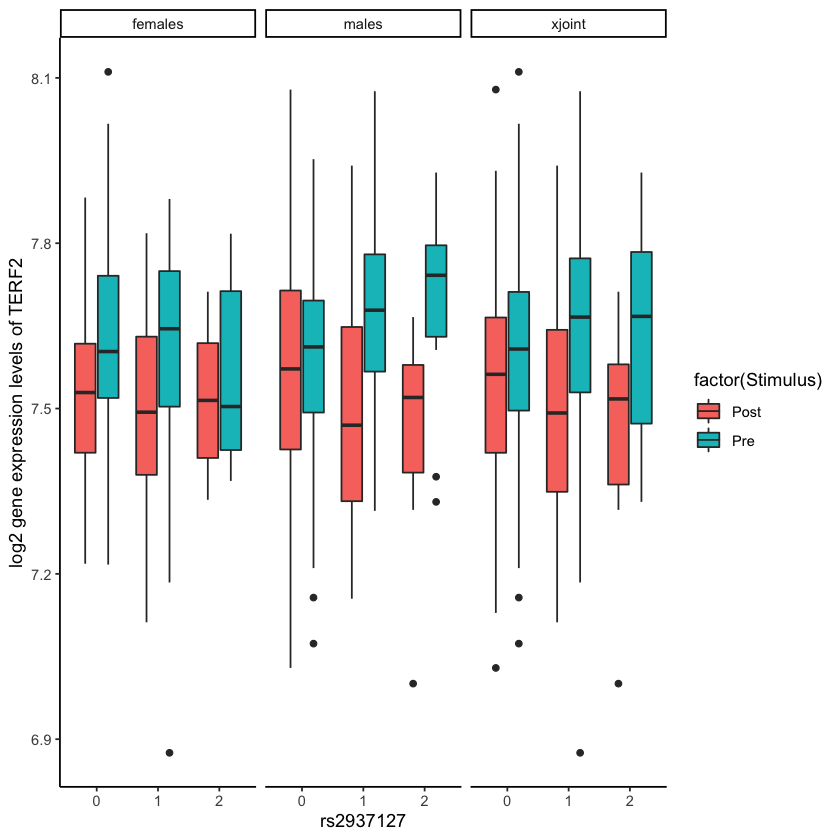

In [15]:
#male specific GR-response eQTL
exampleM = readRDS("data/fig2F_male_eQTL.rds")
#pdf("ILMN_1768488.pdf")
ggplot(na.omit(exampleM), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs2937127")+ylab("log2 gene expression levels of TERF2")
#dev.off()

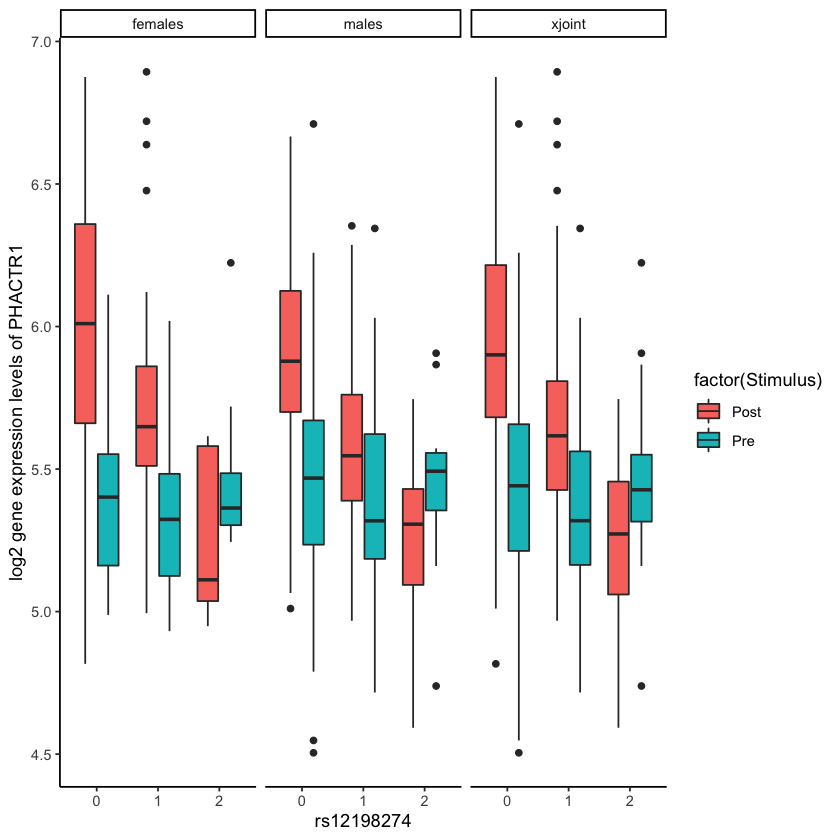

In [16]:
#joint GR-response eQTL
exampleAll = readRDS("data/fig2G_all_eQTL.rds")
#pdf("ILMN_1736982.pdf")
ggplot(na.omit(exampleAll), aes(snp,exp, fill=factor(Stimulus))) +
  geom_boxplot() + facet_wrap(~ sex_n)+theme_classic()+xlab("rs12198274")+ylab("log2 gene expression levels of PHACTR1")
#dev.off()